# Supervised Learning: An Introduction

## Least-squares

The assumption is that $f(X) = E(Y|X)$ is linear.

Here, $X \in R^{n \times (p+1)}$ where the extra parameter is a column of ones for the intercept $\beta_0$.

We assume that $Y = E(Y|X) + \epsilon$ where $\epsilon$ captures the tangents not captured by the predictors (e.g. noise) and $\epsilon \sim N(0, \sigma_{\epsilon}^2)$ independent from $X$.

$$\hat{Y} = \hat{\beta_0} + \sum_{i=1}^n X_{i} \hat{\beta_j} = X^T \hat{\beta}$$

Where the $\beta_0$ term is the model *bias*. The gradient $f^\prime(X) = \beta$ is a vector in input space that points in the steepest uphill direction. To fit the model, a (simple) method is *least squares*. Here, we pick coefficients $\beta$ to minimize the residual sum of squares

$$RSS(\beta) = \sum_{i=1}^n (y_i - x_i^T \beta)^2$$

which shows a quadratic function of the parameters. Therefore, a minimum always exists but may not be unique. In matrix notation, 

$$RSS(\beta) = (y - X \beta)^T (y - X \beta)$$

where X is an $N \times p$ matrix with each row a sample, and y is an N-vector of the outputs in the training set. Differentiating w.r.t. $\beta$ we get the normal equations

$$X^T (y - X \beta) = 0$$

If $X^T X$ is nonsingular (i.e. invertible, $AB = BA = I$), then the unique solution is given by

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

The projection matrix (or hat matrix) $H=X(X^T X)^{-1} X^T$. Our observation $y$. We estimate $\hat{y}$. The best we can do is find the projection of $y$ on the $X$ space.It should happen that the residual (vertical projection axis) should be indpeendent of $\hat{y}$ because the best linear prediction will have no systematic bias. The length of the residual is longer than the current $y$. 

Error is $y - \hat{y} = (I - H)Y$. We must check whether $$Cov[(Y-\hat{Y})Y^T] = E[(I-H)(Y-EY)]$$Because we know $E[Y|X] = XB + \epsilon$, $$ = E[(I-H)\epsilon \epsilon^T H]$$Because $\epsilon \epsilon^T = \sigma_{\epsilon}^2 I$, we conclude that $$=[H - HH]$$

We know $HH = X(X^T X)^{-1} X^T X(X^T X)^{-1} X^T = X(X^T X)^{-1} X^T $

Projecting $y$ to the space that is orthogonal to the $X$ plane is defined by $I-H$.  When we multiply this times $H$, we get $H-HH = 0$.

If given a new input, then the same thing applies. 

We know $RSS$ increases with degrees of freedom, so we use residual stnanard error (RSE) instead:

$$RSE = \sqrt{\frac{RSS}{N - (p + 1)}}$$

This is an unbiased estimator: $\sigma_{\epsilon}^2 = \frac{RSS}{N - (p+1)} = RSE^2$

Therefore, a solution for the best $\beta$ can be found without iteration.

A "poor man's" classifier can use linear regression and predict $1(\hat{Y} > 0.5)$. Ideally, we would like to estimate $P(Y=1|X=x)$

Additionally, 

Because $tr(AB) = tr(BA)$, we know $tr(H) = tr(X(X^T X)^{-1} X^T) = tr((X^T X)^{-1} X^T X) = tr(I p + 1) = p + 1$. To understand residuals, we can understand how bad an outlier is.

$Var(\hat{\epsilon}) = Var(y - \hat{y}) = (1 - H) \hat{\sigma}_\epsilon^2$

$Var(\hat{\epsilon}_i) = (1 - h_i) \hat{\sigma}_\epsilon^2$. This grants $H$ an important role to calculate variance of residuals. If we have a large $h_i$ then the residual has to have a small variance. This is called leverage. 

For simple linear regression (p=1), $h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2}$. Where the ratio $\frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2}$ is the variance, which is always between 0 and 1.

We can standardize the epsilon by the variance (resulting in a t-distribution). 

A large $r_i$, . For instance if $r_i = -2.5$, then the point is at 2.5 percent tail. A large $r_i$ is an outlier.

Cook's distance shows the model evaluation when if the model did not use a specific sample.

$$D_i = \frac{(\mathbf{\hat{y}} - (\mathbf{\hat{y}}_{(i)})}{FILL}$$

As shown here, an influential point must have high leverage and a high standard residual. We call this **influence**, as in it has a large influence on the final model.

On a plot of sqrt of standardized residuals vs fitted values,
if you see a nonlinear pattern, then you may want to transform. The constant residual assumption. Consider transforming X instead of Y.  (If you have heteroscedasticity, consider transforming Y). https://stats.stackexchange.com/questions/116486/why-y-should-be-transformed-before-the-predictors

On a plot of standradized rewiduals vs leverage, 
If near contour, the corresponding cooke's distance will be 0.5. If you observe a point outside 1, then it's a very influential point. If 0.5 to 1, it's influential but not as extreme.



### How do we evaluate our linear model?

We use the residual sum of errors (RSE): the smaller the better. This depends on the unit and scale of the response.

$R^2$ instead measures the proportion of variance explained by regression. 


We can only assume that all of the Ys are IID, so in this case, we get a horizontal line (at the mean). the total variability not explained by the model

$SSE$ (or $RSS$), as described above, measures from the data point to the regression line. the total variability explained by the model. ($=SST - SSR$)

$SSR$ measures from the regression line to the mean (horizontal line).

$SST$ measures from the data point to the mean, defines the total variability in your dataset

We know that $SST = SSE + SSR$.

$R^2$ (r-squared, r squared) measures the proportion of variability which can be explained by the model.

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

For simple linear regression, $Y = \beta_0 + \beta_1 X + \epsilon$, $R^2 = r^2$, where $r$ is the pearson correlation. The pearson correlation coefficient is

$$r = \frac{\hat{CoV}(X,Y)}{\hat{StDev}(X)\hat{StDev}(Y)}$$

It measures how strong X and Y are correlated, and is in range [-1,1].

**Question:** Can we get $F$-statistic from $R^2$?

Yes. We know $n$ (number of samples), $p$ is number of parameters. We know $y = 

### Statistical Inference

A random sample $X_1, X_2, ..., X_n$ be i.i.d., a statistic $T = T(X_1, X_2, ..., X_n)$ is a function of the random sample. Let's say this is the mean. The estimator $\hat{\theta} = \hat{\theta}(X_1, X_2, ..., X_n)$.  Our hypothesis could be to conclude if $H_0 : \theta = \theta_0$ (two-sided).

There are two types of errors (type 1 and type 2).

p-value: Probability obtaininga  value of statistic more extreme than the observed value  $H_0$. This mimics type 1 error.

Confidence interval: $CI(X_1, X_2, ..., X_n)$ interval constructed  from the random sample such that $PR(\theta \in CI(X_1, X_2, ..., X_n)) = 1 - \alpha$. The narrower the confidence is, the more specific the estimation, given a pre-specified confidence level.

### Common distributions

If $Z_i \sim N(0,1)$, i.i.d. then $\sum_i Z_i^2 \sim \chi_n^2$ where $n$ is the number of RVs.

If $Z \sim N(0,1)$ and $W \sim \chi_n^2$ and they are independent then $frac{Z}{\sqrt{W/n}} \sim t_n$. For instance, the ratio of the $\bar{x}$ and sample standard deviaiton $s^2$

If $W_1 \sim \chi_n^2$ and $W_2 \sim X_m^2$ adn they are independent then $F_{n,m}$. For instance if SSE / SSR is large enough.

### Significance t-tests of coefficients

Check importance of the coefficients. Generally, if $\beta_j = 0$, then we say that the predictors are not aiding the model's prediction abilities.

$H_0 : \beta_j = 0$ and $H_1: \beta_j \neq 0$

Note $\hat{\beta} = (X^T X)^{-1} X^T (X \beta + \epsilon)$

Given $X$, $\hat{\beta} \sim N(\beta, (X^T X)^{-1} \sigma_\epsilon^2)$. The expected value is therefore: $\beta$.

Also, $Cov(\hat{\beta}, \hat{\beta}) = E[(\hat{\beta} - \beta) (\hat{\beta} - \beta)^T]E(Y|X) = X\beta

The Z-score for each $\hat{\beta_j}$ is $$z_j = \frac{\hat{\beta_j}}{\hat{\sigma}_{\hat{\beta}}} = \frac{}{}$$

Under null ($\hat{\beta} = 0$), we should get $z_j \sim t_{N-p-1}$.

### More goodness of fit

Bringing in more predictors will reduce SSE naturally (and increase $R^2$). Instead, we can do a hypothesis test.

SSR is independnet of SSE. We define the F-statistic

$$F = \frac{SSR/p}{SSE/(N-p-1)}$$

then $F \sim F_{p, N-p-1}$. The p-value is $Pr(F_{p,N-p-1} \geq F)$. If large F then reject.

There are two parameters to define a line (an intercept and a slope), so if have more predictors (p) then you will have $p$ degrees of freedom for SSR. Residual has $p$ predictors and $1$ y-intercept.

**Question:** Is t-test and f-test equivalent for simple linear regression?

Answer: Yes!


## Nearest neighbors

For regression, calculates average values of the $k$ nearest neighbors. This replaces the expected value (in normal regression) with the sample average. For classification, a majority vote is conducted.

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

If large number of variables, it'll require a larger number $k$.  If kept same, then smaller number of neighbors will be included (**Curse of dimensionality**). Increased number of features, the definition of the neighborhood will also have to expand.  The bias increases. This is because as you add another feature, it'll inherently make the points be further apart.

Also, as you increase $k$, a smoother surface will be formed (i.e. reduced variance).

The best $k$ can be found empirically.


## Bias-variance tradeoff

For a fixed $x_0$, 

$$E [\hat{f}(x_0) - f(x_0)] ^2 = E[ \hat{f}(x_0) - E\hat{f}(x_0) + E\hat{f}(x_0) - \hat{f}(x_0)]^2$$

$$= E[\hat{f}(x) - E\hat{f}(x_0)]^2 + [E\hat{f}(x_0) - f(x_0)]^2 + 2 E\hat{f}(x_0) - f(x_0) E[\hat{f}(x_0) - E\hat{f}(x_0)]$$

We know that $E[\hat{f}(x_0) - E\hat{f}(x_0)] = 0$. Therefore, 

$$Var(\hat{f}(x_0)) + bias(\hat{f}(x_0)^2$$

There is no bias if $k=1$ in nearest neighbor analysis. Small $k$ is small bias but high variance. Large $k$ is the summation over $n$ so benefiting from Variance (because for sample variance, there is a $\frac{1}{n}$ term) will be low but bias will be high.

## Linear regression vs. kNN

Linear regression has high bias (linear assumption can be violated) but only needs to estimate p+1 parameters.

kNN uses $\frac{n}{k}$ parameters but is flexible and adaptive. It is small bias but large variance.


# Linear Algebra Review

Matrix transpose: $A_{ij}^T = A_{ji}$ and $(AB)^T = B^T A^T$

Matrix (dot) product: $C = AB$

Identity matrix $I$ has a diagonal of ones and the rest zero.

Matrix inversion: $A^{-1} A = A A^{-1} =  I_n$

$$Ax = b$$

$$A^{-1} A x = A^{-1} b$$

$$I_n x = A^{-1} b$$

Invertability. We cannot invert a matrix if 1) more rows than columns or 2) more columns than rows, or 3) redundant rows ("linear dependence", "low rank")

Norms L^p norm: 

L2 norm (p=2) is mos often used. It is a distance. 

Eigendecomposition: $A v = \lambda v$

If $\lambda$ is eigenvalue of matrix $A$, there exists an eigenvector $V$ such that 

$$A = V diag(\lambda) V^{-1}$$

We can find $\lambda$ by $\lambda = \frac{V^T A V}{V^T V}$

Every real symmetric matrix has a real, orthogonal eigendecomposition $A = Q \Lambda Q^T$.

This will take two vectors on an $x_1, x_2$ space. When you multiply the matrix, on the direction of v_1, you scale it by $\lambda_1$. This stretches the space.


Trace: $Tr(A) = \sum_i A_{i,i}$

We can switch this around in any way.

$$Tr(ABC) = Tr(CAB) = Tr(BCA)$$

# Probability and Information Theory

A pdf must be contained s.t. $\forall x \in x, p(x) \geq 0$. Additionally, $\sum_{x\in x} p(x) = 1$ or $\int p(x) dx = 1$.

Computing a marginal probability with the **sum rule**

$$p(x) = \int p(x,y) dy$$


Conditional probability: $P(y=y, x=x) = \frac{P(y=y, x=x)}{P(x=x)}$

Chain rule of probability: $P(x_1, ..., x_n) = P(x_1) \pi_{i=1}^n P(x_i | x_1, ..., x_{(i-1)})$

$P(x_1, x_2, x_3) = P(x_1) P(x_2, x_3 | x_1) = P(x_1) p(x_2) p(x_3 | x_1, x_2)$


Independence: $p(x=x, y=y) = p(x=x)p(y=y)$

Expectation: $E_{x\sim P} [f(x)] = \sum_x P(x) f(x)$

Variance and covariance: $E(Z)^2 = Var(Z) + (E Z)^2$ where $Z=f(x) - E f(x)$

$Cov(X,Y) = E(XY) - EX EY$

F distribution is chi-squared divided by chi-squared


## Interval prediction

### Confidence interval

A confidence interval of $f(X) = \sum_{j=0}^p \beta_j x_j$ for given $x=(x_0,...,x_p)^T$ is

$$f(X) \pm \hat{t}_{n-p-1, \alpha/2} \sigma_{\epsilon} \sqrt{\vec{x}^T (X^T X)^{-1} \vec{x})}$$

Why? Hint: What is the distribution of $\vec{x}^T \hat{\beta}$, where $\vec{x} = (x_0=1, x_1, ..., x_p)^T$?

### Prediction interval

A confidence interval of $y = \sum_{j=0}^p \beta_j x_j + \epsilon$ for given $x=(x_0,...,x_p)^T$ is

$\sum(\beta_j x_j - \hat{\beta}_j x_j)$. The CI of $\beta_j x_j$ is calculated above. 

This is the same as $y - \hat{y} = y - \sum \hat{\beta}_j x_j = \epsilon + \sum \beta_j x_j \sum \hat{\beta}_j x_j $

## Review of Conditional Expectation


The conditional expected value is just the expectation when X is specified. 

$$E(Y|X=x) = \int_{y} y dF(y|X=x) = \int_y y f_{y|X}(y|x) dy$$

Conditional expectation is a random variable. Without specificing $X=x$, $E(Y|X)$ is a function of $X$. Because $X$ is a RV, then $E(Y|X)$ is also RV.

Tower property: $E(Y) = E[E(Y|X)]$.

We say that $X$ takes a fixed value such as $x_0 = 0$, then $g(x_0)$ is **deterministic** (i.e. not random). Its form may be unknown, or involves unknown parameters, e.g.

**Example**

$Y = a X^2 + \epsilon$, $\epsilon$ ind $X$, $\epsilon \sim N(0,1)$

$E(Y|X) = E(c + X^2 + \epsilon | X) = c + X^2 + E(\epsilon|X) = c + X^2$ where $E(\epsilon|X)=0$

**Example**

$Y = X^2 + 10X + 20 + \epsilon$

where $\epsilon \sim N(0, 3)$ and $X \sim N(30,10)$

$$
\begin{bmatrix}
X\\
Y\\
\end{bmatrix} = N(
\begin{bmatrix}
\mu_x & \sigma_x^2 + \sigma_{xy}^2\\
\mu_y & \sigma_{xy} + \sigma_x^2
\end{bmatrix}
)
$$

In this case, we know the underlying probability model.

The joint distribution gives a lot of information!

We can evalaute for the best model $f$ by minimizing a loss function (i.e. $L(Y, f(X)) = Y - f(X))^2$)

$$EPE(f) = E L(Y, f(X)) = E(Y - f(X))^2 = \int [y - f(x)]^2 Pr(dx, dy)$$

Because we have assumed that we know the joint distribution (and it's all continuous), then we evaluate an integral.

**The best f is E(Y|X=x)**

^ This depends on your loss function! (using squared loss!) If you use L1 then your best $f$ will be at the median. Squared loss is better because can take derivative of it. However, it can be influenced by extreme values. 

$$EPE(f) = E(Y - f(X))^2 = E[E[(Y - f(x)]^2 | X)]$$

Minimize $E[(Y - f(x)]^2 | X)$ for every X. This can be decomposed

$$E[(Y - f(x)]^2 | X) = E[[Y - E(Y|X) + E(Y|X) - f(X)]^2 | X]$$

With $A = Y - E(Y|X)$ and $B = E(Y|X) - f(X)$

$$= E(A^2 | X) + E(B^2 | X) + 2 E(A \times B | X)$$

We know that at a given $X$, $A \times B$ is a constant. 

$$ = [E[Y|X] - f(X)] [E(Y|X) E[Y|X]]$$

Therefore, $EPE(f) = EPE(E(Y|X)) + B$

If the population is known, then $f(x) = \int y f_{Y|X} (y|x) dy$ simply. This is the ideal case where you have population. However, this is rare.

For Example, if $Y$ is a known funtion of $X$ (with some error), then you know the conditional distribution. From this, you can estimate $f$ as the mean of that conditional distribution.

### Categorical classification

Loss matrix can be used to penalize categories heavier. 

For example, in stock market prediction, we may place a heavier scaler on the loss function for when the stock market 

Popular choice: $L = 1_{K \times K} - I_K$ forms a matrix of ones except for zeros in the diagonal (because no update should be made if it is correct). This can also be expressed as $L(G, \hat{G}(X)) = I(G \neq \hat{G}(X))$. 

The solution that minimizes the EPE is $\hat{G}(x) = arg max_g Pr_{G|X} (g|x)$. The group that maximizes the conditional probability $Pr_{G|X}(g|x)$. This is called the bayes classifier. Its error is called the bayes rate. The group has a prior (original) distribution. For example, increasing and decreasing is equally likely.  According to yesterday's information, update and calculate posterior probability $Pr_{G|X}(g|x)$.

**Example**

Generate $X|G \sim N(\mu_G, I_2)$ where two centers are defined: $\mu_1 = (0,1)^T, \mu_2 = (1,0)^T$

Because this was generated, we know the labels: $G_{1}, ..., G_{100} = 1$ and $G_{101}, ..., G_{200} = 2$. 

The bayes classifier is found by assuming the joint distribution $X|G \sim N(\mu_G, I_2)$. Therefore, each group is equally likely. The boundary between these two groups is found by 

$E(1(G|X)) = P(G=1|x_0) $ versus $P(G=2|x_0)$ and the larger one is chosen for the point.

At the beginning, $P(G=1) = P(G=2) = 0.5$. 

At a sample located at $\vec{X} = (10,9)$, the expectation can be evaluated by $P(G_j = 1 | x_0 = (10,9)) = f(x_0 = (10,9)) = \frac{f(x_0 = (10,9) | G=1)}{f_x( (10, 9) )}$

$f_{N(0,1)}(x_0, x_1)$ is the double normal distribution (a function of X2 and X1).

So plug in the likelihood of observing the X multiplied by the given distribution (per bayesian rule). Bayes rule finds the ratio of the joint probability 

$$ = \frac{f(x_0 | \mu_1) \times P(G=1 | x_0)}{f(x_0 | \mu_1) \times P(G=1 | x_0) + f(x_0 | \mu_2) \times P(G=2 | x_0)}$$

### Linear regression

$$RSS(\beta) = \sum_{i=1}^N (y_i - f(x_i))^2 = \sum_{i=1}^N (y_i - \beta_0 - \sum)^2$$

With a feature $p=1$, what is the estimated $\beta$?

Solution: Take the derivative and then set equal to zero. RSS will have a minimum.

$RSS(\beta_0, \beta_1) = y - X\beta$




## Exercises

**Exercise:** Suppose each of $K$-classes has an associated target $𝑡_𝑘$, which is a vector of
all zeros, except a one in the $k$th position. Show that classifying to the largest element of $\hat{y}$
amounts to choosing the closest target, $min_{k} ||t_k - \hat{y}||$, if the elements of $\hat{y}$ sum to one.

**Proof:** 

$$
T = \begin{bmatrix}
1 & 0 & \dots & 0\\
0 & 1 & \dots & 0\\
0 & 0 & \dots & 1\\
\end{bmatrix}
$$

where $t_k \in T$.

The model predicts $Pr(y_i = t_k)$ where

$$min_k ||t_k - \hat{y} || = min_k \sum_{i=1}^K (t_{k,i} - y_i)^2 = min_k \sum_{i=1}^K t_{k,i}^2 - 2 t_{k,i} y_i + y_i^2$$

For the first term, when $k=i$, the quantity equals 1 else it is 0. Thus, $\sum_i t_{k,i}^2 = 1 for all values of $k$. Likewise, the last term of $\sum_i y_i^2$ is independent of $k$ so that it is constant wrt $k$. Finally, the middle term $\sum_i -2 t_{k,i} y_i = -2 y_i when $k=i$ and is 0 otherwise. Note that it also varies across different values of $k$ so that it is a function of $k$. Then, we can rewrite the above function as a function of only the middle term as follows: 

$$min_k ||t_k - \hat{y} || = min_k \sum_{i=1}^k -2 t_{k,i} y_i \xleftrightarrow{} min_k (-y_k)$$

Multiplying the above quantity by (-1), we can change the min to a max problem.

$$min_k ||t_k - \hat{y} || = max_k y_k$$

Therfore, we state that the largest element in $\hat{y}$ is the closest target.


**Excercise:** Show how to compute the bayes decision boundary for the simulation example in Figure 2.5

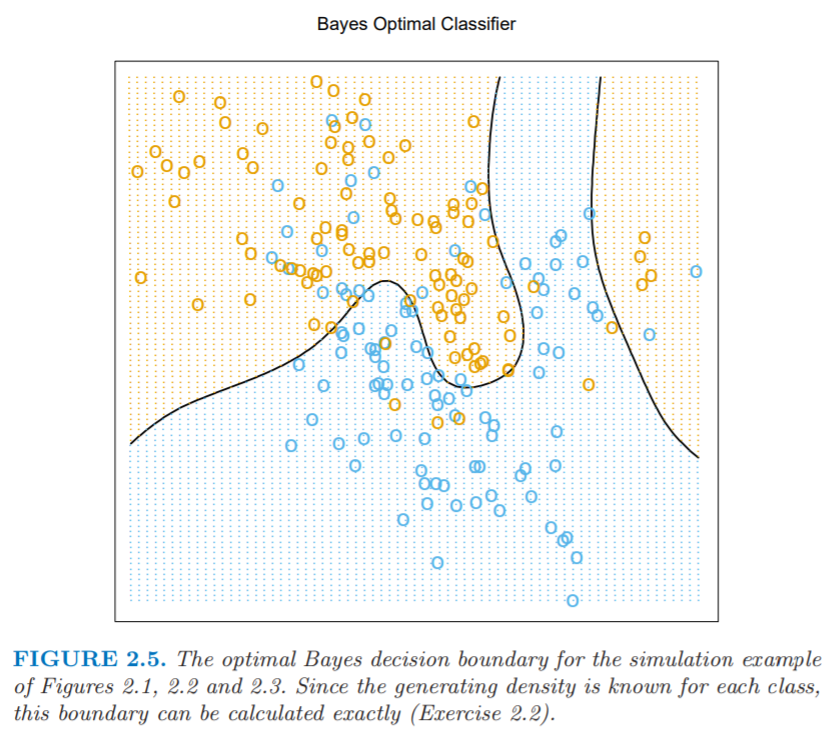

In [6]:
from utils import disp
disp('bayes_decision_boundary.png')

**Proof:**

Above, we see two classes, generated by a mixture of Gaussians. Our generating density is $N(m_k, I / 5)$ is a weighted sum of 10 Gaussians generated from $N((0,1)^T, I)$. 

**Bayes classifier says that we classify to the most probable class using the conditional distribution** $Pr(G|X)$.  Hence, the decision boundary is the set of points that partitions the vector space into two sets: one for each class. On the decision boundary itself, the output label is ambiguous. 

Boundary = $\{ x: max_{g \in G} Pr(g | X=x) = max_{k\in G} Pr(k | X=x)\}$

It is the set of points where the most probable class is tied between two or more classes. 

In the case of two examples, 

Boundary = $\{ x: Pr(g|X=x) = Pr(k|X=x)\} = \{ x: \frac{Pr(g|X=x)}{Pr(k|X=x)}  = 1 \}$

We can rewrite the above quantity by Bayes rule as follows: 

$\frac{Pr(g|X=x)}{Pr(k|X=x)} = \frac{Pr(X=x|g) Pr(g) / Pr(X=x)}{Pr(X=x|k) Pr(k) / Pr(X=x)} = \frac{Pr(X=x | g) Pr(g)}{Pr(X=x|k) Pr(k)} = 1$

because we have 100 points in each class, so $Pr(g) = Pr(k)$. The boundary becomes $\{x: Pr(X=x|g) = Pr(X=x|k) \}$. We know $Pr(X=x|g)$ because we know the generating density is gaussian. So, 

$$Pr(X=x|g) = \Pi_{k=1}^{10} \frac{1}{5 \sqrt{2 \pi}} \exp (- \frac{(x - m_k)^2}{2 \times 25})$$

We take the log to ensure a monotonic function

$$\ln(Pr(X=x|g)) = \sum_{k=1}^{10} \ln( \frac{1}{5 \sqrt{2 \pi}}) - \frac{(x - m_k)^2}{2 \times 25}$$

Equating class $g$ and $k$ to get the decision boundary, we get 

Boundary = $\{ x: \sum_{k=1}^{10} \ln( \frac{1}{5 \sqrt{2 \pi}}) - \frac{(x - m_k)^2}{2 \times 25} = \sum_{k=1}^{10} \ln( \frac{1}{5 \sqrt{2 \pi}}) - \frac{(x - n_i)^2}{2 \times 25} \}$

The observations of cluster 1 ($m_k$) and cluster 2 ($n_i$) help generate the exact boundary.

In [7]:
import numpy as np
import pandas as pd

class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = len(np.unique(y_train))

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            print(neighbors)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])

            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)

        return float(sum(y_pred == y_test)) / float(len(y_test))


data = np.array(
    [
        [0,3,0,1],
        [2,0,0,1],
        [0,1,3,1],
        [0,1,2,0],
        [1,0,1,0],
        [1,1,1,1]
    ]
)

X = data[:,0:3]
y = data[:,-1]

k = 3
knn = KNearestNeighbors(X,y,n_neighbors=k)
knn.predict([[0,0,0]])

[[4 5 1]]


array([1], dtype=int64)

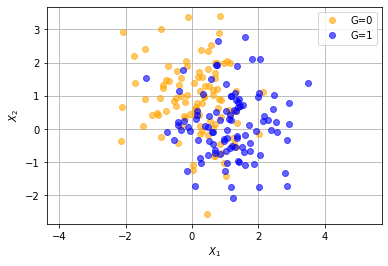

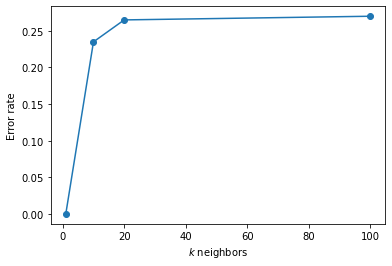

m [[ 1.15981357 -0.59760123]]
b [-0.43829084]
-0.4382908386736625 1.1598135678848691 -0.5976012319170687


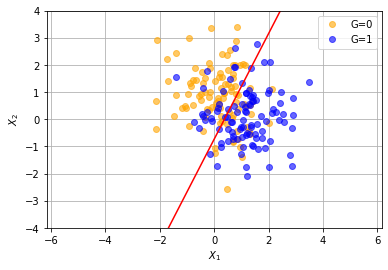

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

np.random.seed(1234)

alpha = 0.95
cov = [[1, 0], [0, 1]]  # diagonal covariance

mean0 = np.array([0, 1])
x, y = np.random.multivariate_normal(mean0, cov, 100).T
plt.plot(x, y, 'o', color='orange', label='G=0', alpha=0.6)

mean1 = np.array([1, 0])
x2, y2 = np.random.multivariate_normal(mean1, cov, 100).T
plt.plot(x2, y2, 'bo', label='G=1', alpha=0.6)

plt.axis('equal')
plt.legend()
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.grid('..')
plt.show()

X = np.append(np.column_stack((x,y)), np.column_stack((x2,y2)), axis=0)
Y = np.append(np.zeros(len(x)), np.ones(len(x2))).astype(float)

nneighbors = [1,10,20,100]

accs = []
for n in nneighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X, Y)
    yhat = neigh.predict(X)
    acc = accuracy_score(Y, yhat)
    accs.append(1 - acc)

plt.plot(nneighbors, accs, 'o-')
plt.xlabel(r'$k$ neighbors')
plt.ylabel('Error rate')
plt.show()


plt.plot(x, y, 'o', color='orange', label='G=0', alpha=0.6)
plt.plot(x2, y2, 'bo', label='G=1', alpha=0.6)

plt.axis('equal')
plt.legend()
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.grid('..')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(X, Y)

print('m', lda_object.coef_)
print('b', lda_object.intercept_)

x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

i = 0
c = 'r'
b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
print(b, w1, w2)
y1 = -(b+x1*w1)/w2    
plt.plot(x1,y1,c=c)

plt.xlim(-3,3)
plt.ylim(-4,4)
plt.show()
           

In [9]:
# Importing necessary libraries...
import collections 
import numpy as np
from numpy import sqrt, exp

def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]

    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0]
                                                      - n_0) - 1))
    return m, v # mean and variance 

def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            product = product * (1/sqrt(2*3.14*v[i][j])) * exp(-0.5
                                 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

print(Y)

# executing the Gaussian Naive Bayes for the test instance...
m, v, pre_probab, pfc, pcf, prediction = GNB(X, Y, np.array([0, 0]))
print(m) # Output given below...(mean for 2 classes of all features)
print(v) # Output given below..(variance for 2 classes of features)
print(pre_probab) # Output given below.........(prior probabilities)
print(pfc) # Output given below............(posterior probabilities)
print(pcf) # Conditional Probability of the classes given test-data
print(prediction) # Output given below............(final prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [19]:
import numpy as np
from scipy import stats
from pprint import pprint
np.random.seed(1)

n = 100
p = 1

model_type = 'y=f(x)'
#model_type = 'x=f(y)'

#add_intercept = False
add_intercept = True

df = pd.read_csv('_static//datamining_hw2_question2.csv')
xx = df['x'].values
yy = df['y'].values

# GENERATE DATA IN PYTHON
# xx = np.random.normal(0,1,n)
# yy = 2 * xx + np.random.normal(0,1,n)

if model_type == 'y=f(x)':
    y = yy
    x = xx
elif model_type == 'x=f(y)':
    y = xx
    x = yy

if add_intercept:
    xvec = np.hstack((np.vstack(np.ones(len(x))),np.vstack(x)))
else:
    xvec = np.vstack(x)

def f(arr):
    if add_intercept:
        return m[0] + m[1] * arr
    else:
        return m * arr

m = np.dot(np.linalg.inv(np.dot(xvec.T, xvec)), np.dot(xvec.T, y))
# also,  m, _, _, _ = np.linalg.lstsq(xvec, y)

yhat = f(x)

print('constants', m)

def analyze_linear_model(y, yhat, x, n, p):
    ybar = np.sum(y)/len(y)

    residuals = y - yhat
    SSR = np.sum((yhat - ybar)**2)
    SST = np.sum((y - ybar)**2)
    SSE = np.sum((y - yhat)**2)   # or   residuals.T @ residuals

    RSE = np.sqrt(SSR / (n - 2))
    MSE = (sum((y-yhat)**2))/(n-p)

    correlation_r = []
    for col in range(x.shape[1]):
        correlation_r.append(np.cov(x[:,col],y)[0][1]/ (np.std(x[:,col]) * np.std(y)))

    sigma_squared_hat = SSE / (n - p)
    var_beta_hat = (np.linalg.inv(xvec.T @ xvec) * sigma_squared_hat)[0][0]
    # or var_beta_hat = MSE*(np.linalg.inv(np.dot(xvec.T,xvec)).diagonal())

    sd_b = np.sqrt(var_beta_hat)
    ts_b = m/ sd_b
    p_ttest =2*(1-stats.t.cdf(np.abs(ts_b),(n - p)))

    F = (SSR/p)/(SSE/(n - p - 1))
    p_ftest = stats.f.cdf(F, p, n-p-1)

    R2_another_calc = 1 - (1 + F * (p) / (n - p - 1))**(-1)

    # print("r2 another way", R2_another_calc)

    info = {'SSR': SSR,
            'SSE': SSE,
            'SST': SST,
            'r2': SSR / SST,
            'RSE': RSE,
            'MSE': MSE,
            'r': correlation_r,
            'Var(Bhat)': var_beta_hat,
            'Sd(Bhat)': sd_b,
            't(Bhat)': ts_b,
            'p_ttest(Bhat)': p_ttest,
            'F(Bhat)': F,
            'p_ftest(Bhat)': p_ftest
    }

    pprint(info)

    import statsmodels.api as sm
    model = sm.OLS(y,x)
    results = model.fit()
    results_summary = results.summary()
    print(results_summary)

analyze_linear_model(y, yhat, xvec, n, p)

# Approximate form of t-test (for a no-intercept model)
approx_t_bhat = (np.sqrt(n - 1) * np.sum(x * y)) / np.sqrt(np.sum(x**2) * np.sum(y**2) - (np.sum(x * y))**2)
'approx_t_bhat', approx_t_bhat

constants [-0.03769261  1.99893961]
{'F(Bhat)': 344.31026392149494,
 'MSE': 0.9175314048171069,
 'RSE': 1.8045834713513378,
 'SSE': 90.83560907689355,
 'SSR': 319.1391074972955,
 'SST': 409.97471657418896,
 'Sd(Bhat)': 0.09649621618971455,
 'Var(Bhat)': 0.009311519738932126,
 'p_ftest(Bhat)': 0.9999999999999999,
 'p_ttest(Bhat)': array([0.69692306, 0.        ]),
 'r': [nan, 0.8912022644583839],
 'r2': 0.7784360707998542,
 't(Bhat)': array([-0.39061235, 20.7152124 ])}
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     344.3
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           7.72e-34
Time:                        23:36:52   Log-Likelihood:                -137.09
No. Observations:                 100   AIC:          

<ipython-input-19-9a69040a4fca>:61: RuntimeWarning: invalid value encountered in double_scalars
  correlation_r.append(np.cov(x[:,col],y)[0][1]/ (np.std(x[:,col]) * np.std(y)))


('approx_t_bhat', 18.725931937448564)

coefficients: [ 0.96336777 -0.00106039]
{'F(Bhat)': 9.688994986727712e-05,
 'MSE': 0.9175314048171055,
 'RSE': 0.000957285225564735,
 'SSE': 90.83560907689338,
 'SSR': 8.980671030228349e-05,
 'SST': 90.83569888360368,
 'Sd(Bhat)': 0.15264724593880155,
 'Var(Bhat)': 0.023301181692700963,
 'p_ftest(Bhat)': 0.007833655479728183,
 'p_ttest(Bhat)': array([7.85467913e-09, 9.94471403e-01]),
 'r': [nan, -0.0010043634931031394],
 'r2': 9.886719803561072e-07,
 't(Bhat)': array([ 6.31107208, -0.00694664])}
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 9.689e-05
Date:                Mon, 20 Sep 2021   Prob (F-statistic):              0.992
Time:                        01:29:19   Log-Likelihood:                -137.09
No. Observations:        

<ipython-input-19-9a69040a4fca>:61: RuntimeWarning: invalid value encountered in double_scalars
  correlation_r.append(np.cov(x[:,col],y)[0][1]/ (np.std(x[:,col]) * np.std(y)))


array([[1.0000000e+00, 9.8867198e-07],
       [9.8867198e-07, 1.0000000e+00]])

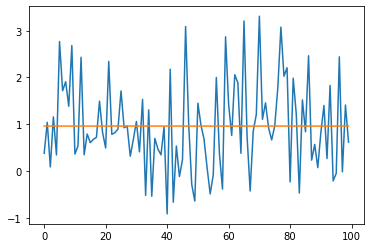

In [23]:
import numpy as np
from scipy import stats
import pandas as pd
from pprint import pprint
np.random.seed(1)

n = 100
p = 1

# TO BUILD IN PYTHON
# X = np.random.normal(np.arange(1,p+1), 1, (n,p))
# eps = np.random.normal(0,1,n)
# beta_star = np.array([1.0,0.0,2.0,-0.5,0.5,1.0])[:p+1]
# y = np.dot(xvec, beta_star) + eps

# Read in from R to ensure same data

if p == 5:
    filename = "_static//datamining_hw2_question3.csv"
    df = pd.read_csv(filename, index_col=0)
    X = df[[f'x.{i}' for i in range(1,p+1)]].values
    y = df['y'].values

else:
    filename = "_static//datamining_hw2_question3c.csv"
    df = pd.read_csv(filename, index_col=0)
    X = df[['x']].values
    y = df['y'].values

xvec = np.hstack((np.vstack(np.ones(len(X))),np.vstack(X)))

m = np.dot(np.linalg.inv(np.dot(xvec.T, xvec)), np.dot(xvec.T, y))

print('coefficients:', m)
yhat = np.dot(xvec, m)

analyze_linear_model(y, yhat, xvec, n, p)

import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(yhat)

r2 = np.corrcoef(y,yhat) ** 2
r2


TODO: add CI for betas, try out MLE solution (maximize log likelihood across parameter lambda in a boxcox), add H leverage, add standard error r, plot standandard error (y) vs leverage (x) and add cookes distance lines

## Collinearity

$(X^T X)_{2,2}$ where $X$ is centered by the means is equal to the $(n-1) \times Var(X_1)$.

$(X^T X)_{2,3}$ where $X$ is centered by the means is equal to the $(n-1) \times Cov(X_1, X_2)$, which generates a 2x2 matrix. This 2x2 matrix is not full rank (it is of rank 1 in this case). It is also not invertible. It is ill-conditioned matrix. 

When inverse the matrix, $n$ should go to the denominator. 

The power is 1 - type2 error. The prob that a non-zero beta is detected to be non-zero.

We use collinearity $VIF(\hat{\beta}_j)$

Model selection uses regularized solution.

Full rank when no collinearity.

$X^T X$. if p > n then will not have a full rank matrix; we cannot define x s.t. 


$Var(\hat{\beta}) = (X^T X)^{-1} \sigma_\epsilon^2$

## Multicollinearity

Majority of variability in $X_p$ can be explained by the other predictors.

So, build regression of predictor combinations (e.g. X1 vs X2 and X3,  X2 vs X1 and X3,  X3 vs X1 and X2) to find an $R^2$ score for each. If high $R^2$, then potential multicollinearity. This is captured in the variance inflation factor (VIF) score

$$VIF(\hat{\beta}_j) = \frac{1}{1 - R_j^2} \geq 1$$

$R_{ij} = 0.8$ means 80% of the variability has been explained by the others.

## Metrics from the training dataset

For $d$ features. As you increase the $d$, RSS will increase. But, $\hat{\sigma}_\epsilon^2$ will decrease.

Mallow's $C_p$: 

$$C_p = \frac{1}{n} (RSS + 2 d \hat{\sigma}_\epsilon^2)$$

**AIC (smaller is better)**

$$AIC = \frac{1}{n \hat{\sigma}_\epsilon^2} (RSS + 2 d \hat{\sigma}_\epsilon^2)$$

**BIC (smaller is better)**

$$AIC = \frac{1}{n \hat{\sigma}_\epsilon^2} (RSS + 2 \log(n) d \hat{\sigma}_\epsilon^2)$$

BIC tends to select the smaller model (in number of features), compared to AIC. 

### Model selection

Forward selection may not always be able to find the best model. 
